In [11]:
import  numpy as np
from sklearn import metrics

np.random.seed(42)

y_true = np.random.randint(0,2,size=5)
y_pred = np.ones(5, dtype=np.int32)
metrics.accuracy_score(y_true, y_pred)

0.2

In [13]:
y_true == 1

array([False,  True, False, False, False])

In [14]:
y_pred == 1

array([ True,  True,  True,  True,  True])

In [16]:
(y_true==1)*(y_pred==1)

array([False,  True, False, False, False])

In [17]:
np.sum(np.array([1,2,3,4,5]))

15

In [18]:
metrics.precision_score(y_true, y_pred)

0.2

In [20]:
metrics.recall_score(y_true, y_pred)

1.0

In [23]:
x = np.linspace(0,10,100)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

Text(0, 0.5, 'y')

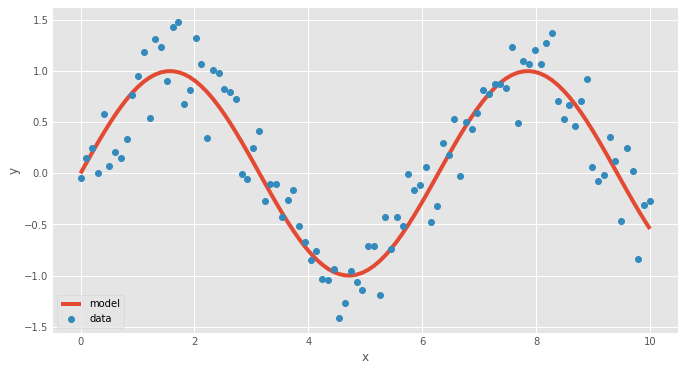

In [45]:
y_true = np.sin(x)+np.random.rand(x.size)-0.5
y_pred = np.sin(x)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(x,y_pred, linewidth=4, label='model')
plt.plot(x, y_true, 'o', label='data')
plt.legend(loc='lower left')
plt.xlabel('x')
plt.ylabel('y')

In [50]:
mse = np.mean((y_true - y_pred)**2)

NameError: name 'y_true' is not defined

In [ ]:
mse

In [ ]:
metrics.mean_squared_error(y_true, y_pred)

In [ ]:
fvu = np.var(y_true-y_pred)/np.var(y_true)
fve = 1-fvu
fve

In [ ]:
metrics.explained_variance_score(y_true, y_pred)

In [ ]:
metrics.r2_score(y_true, y_pred)

Text(0, 0.5, 'y coordinate')

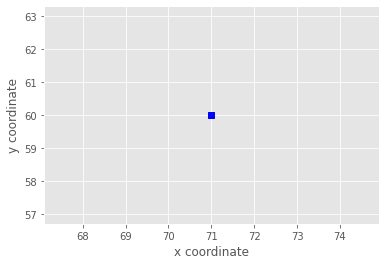

In [68]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
np.random.seed(42)
single_data_point = np.random.randint(0,100,2)

sigle_label = np.random.randint(0,2,1)

def generate_data(num_samples, num_features=2):
    data_size = (num_samples, num_features)
    data = np.random.randint(0, 100, size = data_size)
    labels_size = (num_samples, 1)
    labels = np.random.randint(0,2,size=labels_size)
    return data.astype(np.float32), labels

train_data, labels = generate_data(11)

plt.plot(train_data[0,0], train_data[0,1], 'bs')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')



In [69]:
def plot_data(all_blue, all_red):
    plt.figure(figsize=(10,6))
    plt.scatter(all_blue[:,0], all_blue[:,1], c='b', marker='s',s=180)
    plt.scatter(all_red[:,0],all_red[:,1],c='r',marker='^',s=180)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')

labels.ravel()

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1])

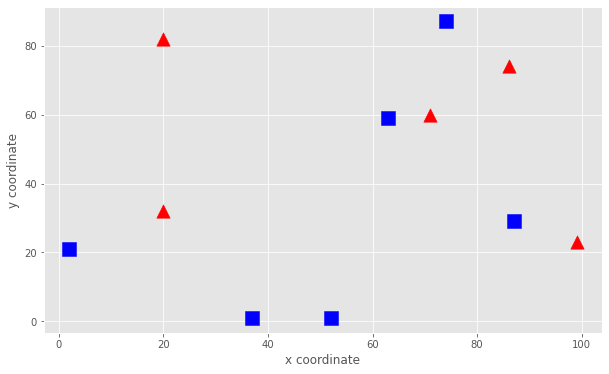

In [70]:
labels.ravel() == 0
blue = train_data[labels.ravel() == 0]
red = train_data[labels.ravel() == 1]
plot_data(blue, red)

In [71]:
knn = cv2.ml.KNearest_create()
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)


True

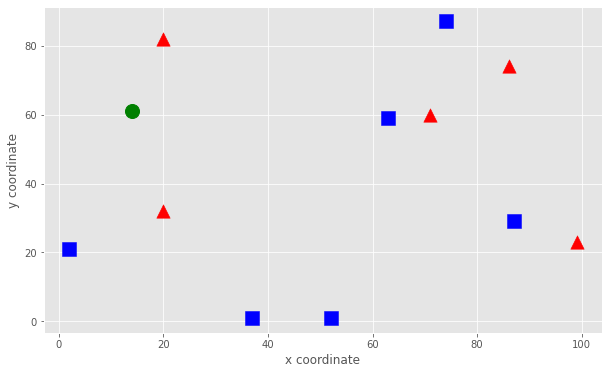

In [73]:
newcommer, _ = generate_data(1)
plot_data(blue, red)
plt.plot(newcommer[0,0],newcommer[0,1], 'go', markersize=14)

In [77]:
ret, results, neighbor, dist = knn.findNearest(newcommer, 1)
print(results)
print(neighbor)
print(dist)
ret, results, neighbor, dist = knn.findNearest(newcommer, 7)
print(results)
print(neighbor)
print(dist)

[[1.]]
[[1.]]
[[477.]]
[[0.]]
[[1. 1. 0. 0. 1. 0. 0.]]
[[ 477.  877. 1744. 2405. 3250. 4129. 4276.]]


In [83]:
import cv2
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection as modsel
from sklearn import linear_model
import pandas as pd
plt.style.use('ggplot')


In [90]:
boston = datasets.load_boston()
dir(boston)
boston.data
pd.DataFrame(boston.data)
boston.data.shape
boston.target.shape

(506,)

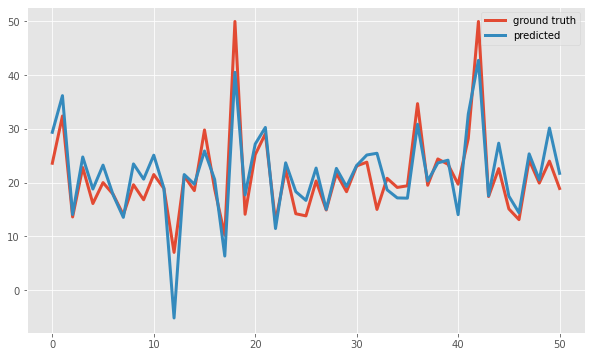

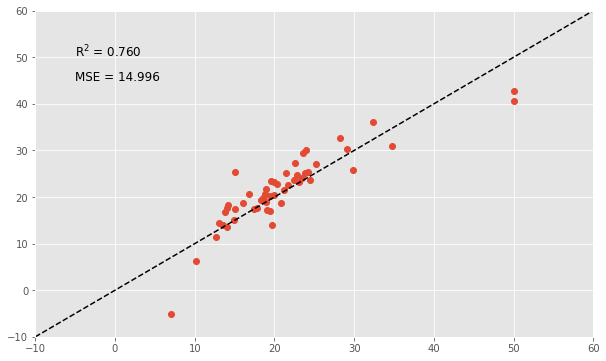

In [110]:
linreg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = modsel.train_test_split(boston.data, boston.target, test_size=0.1,random_state=42)
linreg.fit(X_train, y_train)


metrics.mean_squared_error(y_train, linreg.predict(X_train))

linreg.score(X_train, y_train)

y_pred = linreg.predict(X_test)
metrics.mean_squared_error(y_test,y_pred)


plt.figure(figsize=(10,6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')

plt.figure(figsize=(10,6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10,60], [-10,60],'k--')
plt.axis([-10,60,-10,60])

scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12);


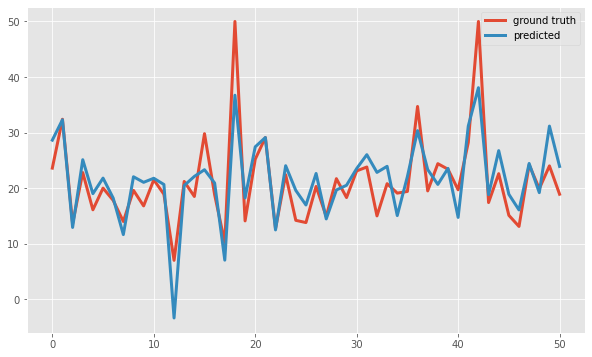

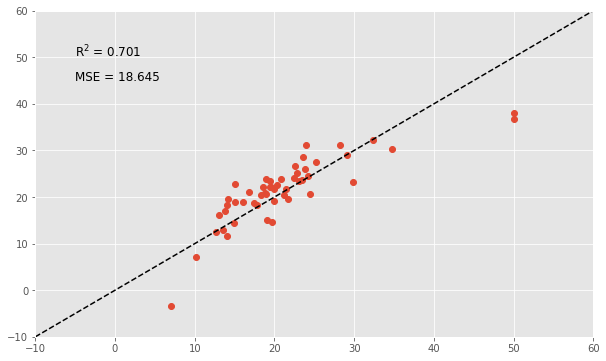

In [111]:
lassoreg = linear_model.Lasso()
ridgereg = linear_model.Ridge()
linreg = linear_model.Lasso()
X_train, X_test, y_train, y_test = modsel.train_test_split(boston.data, boston.target, test_size=0.1,random_state=42)
linreg.fit(X_train, y_train)


metrics.mean_squared_error(y_train, linreg.predict(X_train))

linreg.score(X_train, y_train)

y_pred = linreg.predict(X_test)
metrics.mean_squared_error(y_test,y_pred)


plt.figure(figsize=(10,6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')

plt.figure(figsize=(10,6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10,60], [-10,60],'k--')
plt.axis([-10,60,-10,60])

scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12);


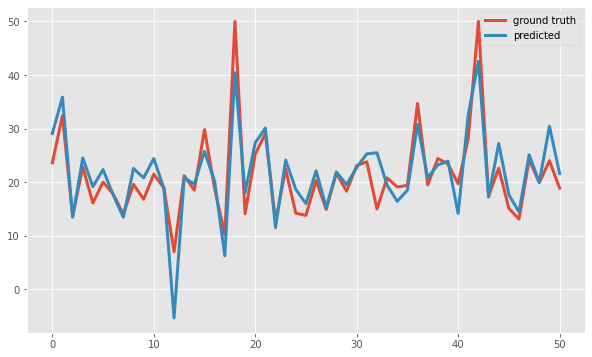

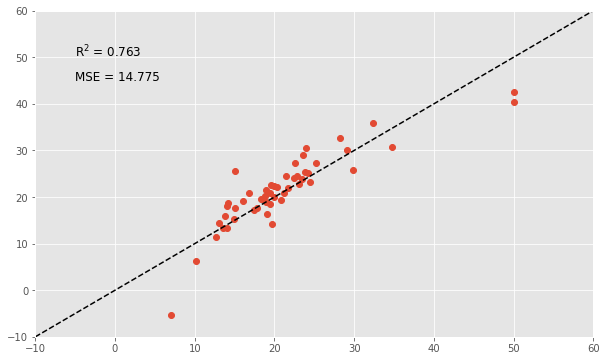

In [113]:
lassoreg = linear_model.Lasso()
ridgereg = linear_model.Ridge()
linreg = linear_model.Ridge()
X_train, X_test, y_train, y_test = modsel.train_test_split(boston.data, boston.target, test_size=0.1,random_state=42)
linreg.fit(X_train, y_train)


metrics.mean_squared_error(y_train, linreg.predict(X_train))

linreg.score(X_train, y_train)

y_pred = linreg.predict(X_test)
metrics.mean_squared_error(y_test,y_pred)


plt.figure(figsize=(10,6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')

plt.figure(figsize=(10,6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10,60], [-10,60],'k--')
plt.axis([-10,60,-10,60])

scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12);

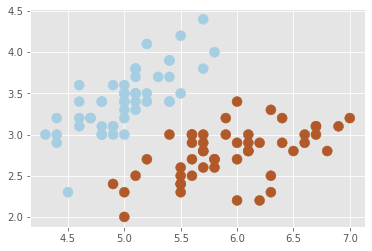

In [122]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()

idx = (iris.target != 2)
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=100)

In [124]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.1, random_state=42)
lr = cv2.ml.LogisticRegression_create()
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setIterations(100)
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [126]:
lr.get_learnt_thetas()

array([[-0.04090133, -0.01910263, -0.16340333,  0.28743777,  0.11909772]],
      dtype=float32)

In [130]:
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0